In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None), xticks=None):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    if xticks is None:
        plt.xticks(fontsize = font['size'], fontname = "serif")
    else:
        plt.xticks(xticks, fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")
    
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

In [2]:

def ReadReferenceF(filename):
    ofile_prob_E = open(filename,"r")
    Reference_dict = {}
    idx_jj = 0
    while(True):
        line = ofile_prob_E.readline()
        if not line:
            break

        line = ofile_prob_E.readline()
        bin_centers = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        jj = float(line.split()[-1].replace("kBT=",""))

        line = ofile_prob_E.readline()
        F = np.array([float(x) for x in line.split()])

        Reference_dict[jj]=np.stack([bin_centers, F])
    ofile_prob_E.close()
    return Reference_dict




In [3]:
def ReadReferenceF_potE(filename, readerror=False):
    ofile_prob_E = open(filename,"r")
    Reference_dict = {}
    idx_jj = 0
    while(True):
        line = ofile_prob_E.readline()
        if not line:
            break

        line = ofile_prob_E.readline()
        bin_centers = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        jj = float(line.split()[-1].replace("kBT=",""))

        line = ofile_prob_E.readline()
        F = np.array([float(x) for x in line.split()])
        if readerror:
            line = ofile_prob_E.readline()
            if not "ERROR" in line: 
                raise Exception("ERROR:: ERROR data not found in ", filename)
            line = ofile_prob_E.readline()
            errF = np.array([float(x) for x in line.split()])
        if readerror:
            Reference_dict[jj]=np.stack([bin_centers, F, errF])
        else:
            Reference_dict[jj]=np.stack([bin_centers, F])
    ofile_prob_E.close()
    return Reference_dict



In [4]:
ref_dirname = "/nfs/scistore14/chenggrp/ptuo/NeuralRG/data/ising-latt%dx%d-T4.0/latt%dx%d/"%(6,6,6,6)
Reference_dict_latt6 = ReadReferenceF(os.path.join(ref_dirname, "F-MAGN-REF.dat"))
Reference_dict_potE_latt6 = ReadReferenceF_potE(os.path.join(ref_dirname, "F-E-REF.dat"))


In [5]:
Expectation_Reference_dict_latt6 = {}
Expectation_Reference_dict_latt6["PotE"] = np.loadtxt(os.path.join(ref_dirname, "Expectation-E-REF.dat"), skiprows=1)

In [6]:
print(Expectation_Reference_dict_latt6["PotE"][:,0])
print(Expectation_Reference_dict_latt6["PotE"][:,1]/6**2)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6.  8. ]
[-1.97026988 -1.96190508 -1.94176851 -1.90239366 -1.83474054 -1.72269063
 -1.56182895 -1.36432234 -1.00353936 -0.78041648 -0.64612818 -0.55484283
 -0.49675696 -0.44734715 -0.40840359 -0.37591402 -0.34839315 -0.2563414 ]


In [7]:

def ReadPredF(filename):
    ofile_prob_E = open(filename,"r")
    Reference_dict = {}
    idx_jj = 0
    while(True):
        line = ofile_prob_E.readline()
        if not line:
            break
        jj = float(line.split()[1].replace("alpha-1=","").replace(";",""))
        line = ofile_prob_E.readline()
        bin_centers = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        line = ofile_prob_E.readline()
        F = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        line = ofile_prob_E.readline()
        errF = np.array([float(x) for x in line.split()])
        Reference_dict[jj]=np.stack([bin_centers, F, errF])
    ofile_prob_E.close()
    return Reference_dict

# Unconditional flow
## Lattice size = 6x6
$\alpha=0.5, \alpha=1.0, \alpha=9.0$

In [8]:
Pred_dict_withconditions_L6 = []
Pred_dict_withconditions_L36 = []

In [9]:
Pred_dict = {}
Pred_dict["Lattice_dim"] = (6,6)
Pred_dict["Flow"] = ReadPredF("clf/guidanceM/val_baseline_latt6x6/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/FES-MAGN.dat")

In [10]:
Pred_dict["Flow-PotE"] = ReadPredF("clf/guidanceM/val_baseline_latt6x6/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/FES-E.dat")

In [11]:
Pred_dict["FlowProbs-PotE"] = ReadPredF("clf/guidanceM/val_baseline_latt6x6/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/PROB-E.dat")

In [12]:
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
colors = [plt.colormaps["gnuplot"](float(i)/4.) for i in range(4)]
print(colors, len(colors))

[(np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0)), (np.float64(0.5009794328681196), np.float64(0.015809545348320027), np.float64(0.9999810273487268), np.float64(1.0)), (np.float64(0.7084919084320762), np.float64(0.12647636278656021), np.float64(0.0), np.float64(1.0)), (np.float64(0.8677218312746247), np.float64(0.4268577244046407), np.float64(0.0), np.float64(1.0))] 4


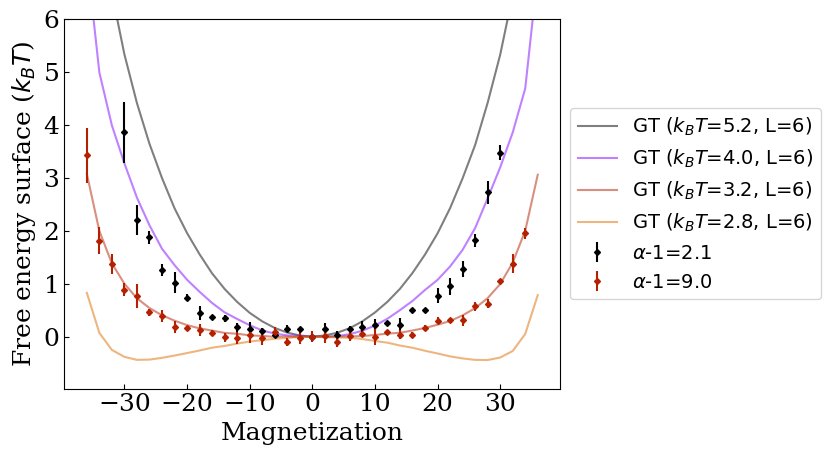

In [13]:
for i, T in enumerate([5.2, 4.0, 3.2, 2.8]):
    # if T in [8.0]:
    #     continue
    baseline = Reference_dict_latt6[T][1][np.where(Reference_dict_latt6[T][0]==0.)]
    plt.plot(Reference_dict_latt6[T][0], Reference_dict_latt6[T][1]-baseline, label=r"GT ($k_BT$=%.1f, L=6)"%(T), c=colors[i], alpha=0.5)
'''
diffstep = 9
baseline = Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1][np.where(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)
'''
diffstep = 18
baseline = Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1][np.where(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

diffstep=79
baseline = Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1][np.where(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

setfigform_simple("Magnetization", "Free energy surface ($k_BT$)", ylimit=(None, 6))
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

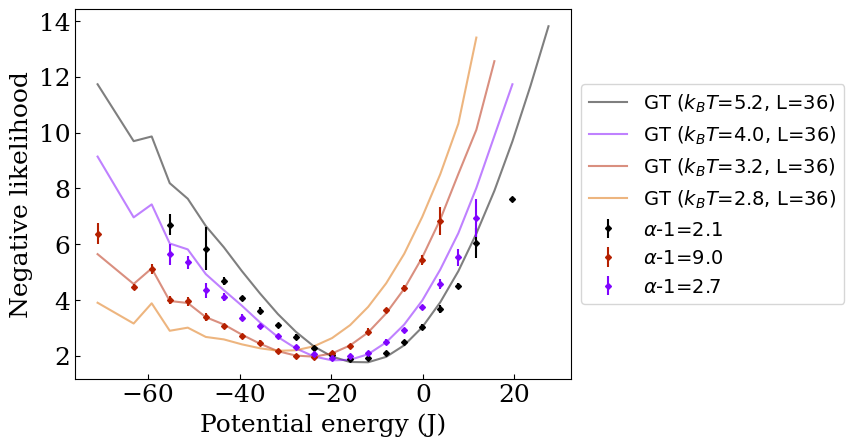

In [14]:
for i, T in enumerate([5.2, 4.0, 3.2, 2.8]):
    # if T in [8.0]:
    #     continue
    plt.plot(Reference_dict_potE_latt6[T][0], Reference_dict_potE_latt6[T][1], label=r"GT ($k_BT$=%.1f, L=36)"%(T), c=colors[i], alpha=0.5)
'''
diffstep = 9
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)
'''
diffstep = 18
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

diffstep = -1
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

diffstep = 24
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[1], marker="D", ms=3)

setfigform_simple("Potential energy (J)", "Negative likelihood")
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
Pred_dict["FlowExpectations-PotE"] = []
for diffstep in range(80):
    Jac_Expectation = Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]
    var_Prob = Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2]**2
    err_Expectation = np.sqrt(Jac_Expectation*var_Prob*Jac_Expectation).sum()
    Pred_dict["FlowExpectations-PotE"].append([list(Pred_dict["Flow-PotE"].keys())[diffstep],(Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1]*Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]).sum(), err_Expectation])

Pred_dict["FlowExpectations-PotE"] = np.array(Pred_dict["FlowExpectations-PotE"])

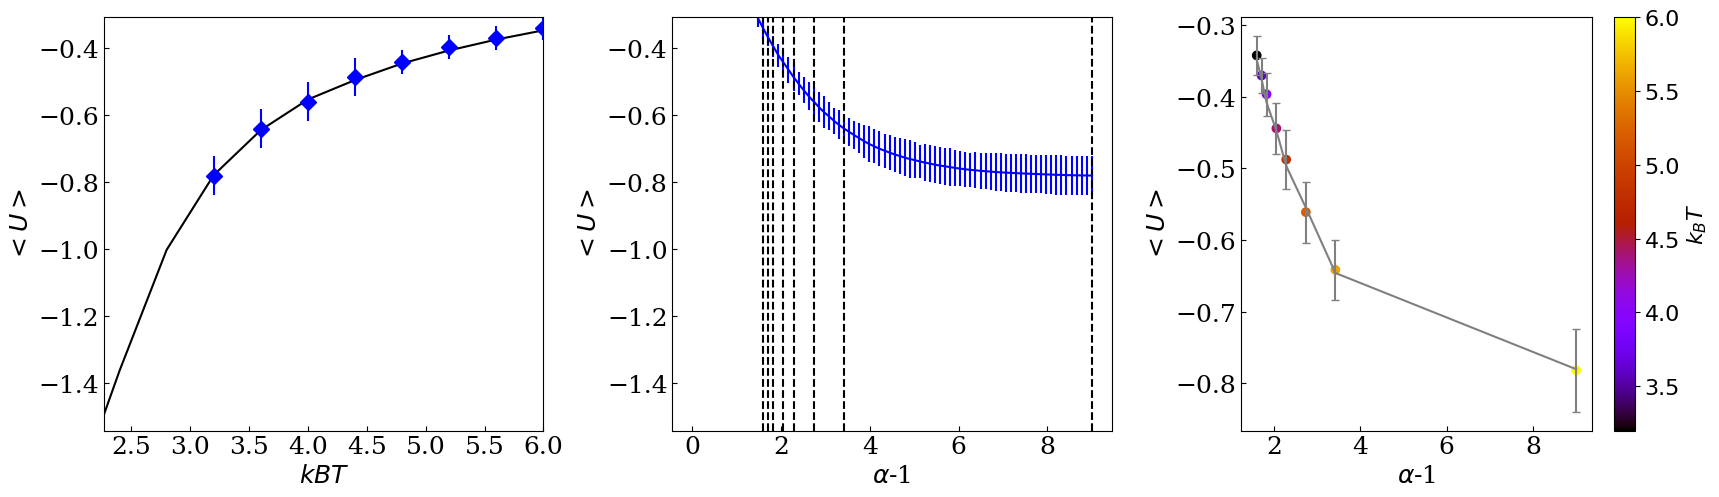

In [76]:
plt.figure(figsize=(17,5))
plt.subplot(131)
plt.plot(Expectation_Reference_dict_latt6["PotE"][:,0], Expectation_Reference_dict_latt6["PotE"][:,1]/6**2, c="k")

plt.errorbar(3.2, Pred_dict["FlowExpectations-PotE"][-1,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][-1,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(3.6, Pred_dict["FlowExpectations-PotE"][30,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][-1,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(4.0, Pred_dict["FlowExpectations-PotE"][24,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][-1,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(4.4, Pred_dict["FlowExpectations-PotE"][20,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][-1,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(4.8, Pred_dict["FlowExpectations-PotE"][18,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][18,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(5.2, Pred_dict["FlowExpectations-PotE"][16,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][18,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(5.6, Pred_dict["FlowExpectations-PotE"][15,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][18,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(6.0, Pred_dict["FlowExpectations-PotE"][14,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][18,2]/6**2, c="blue", fmt="D", ms=8)
plt.xlim((2/np.log(1+np.sqrt(2)),6))
plt.ylim((-2000/36**2,-400/36**2))
setfigform_simple("$kBT$", "$<U>$")
plt.subplot(132)
plt.errorbar(Pred_dict["FlowExpectations-PotE"][:,0], Pred_dict["FlowExpectations-PotE"][:,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][:,2]/6**2, c="blue", fmt="-")
setfigform_simple(r"$\alpha$-1", "$<U>$")
for i in [14,15,16,18,20,24,30,79]:
    plt.axvline(list(Pred_dict["Flow-PotE"].keys())[i], c="k", linestyle="--")

plt.ylim((-2000/36**2,-400/36**2))
plt.tight_layout()
plt.subplot(133)
Benchmark_steps = np.array([14,15,16,18,20,24,30,79]).astype(int)
Benchmark_T = np.flip(np.array([3.2,3.6,4.0,4.4,4.8,5.2,5.6,6.0]))
Reference_idx = np.array([np.where(Expectation_Reference_dict_latt6["PotE"][:,0] == T)[0][0] for T in Benchmark_T])

plt.errorbar(Pred_dict["FlowExpectations-PotE"][Benchmark_steps,0], Pred_dict["FlowExpectations-PotE"][Benchmark_steps,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][Benchmark_steps,2]/6**2, fmt='none', ecolor='gray', capsize=3)
plt.scatter(Pred_dict["FlowExpectations-PotE"][Benchmark_steps,0], Pred_dict["FlowExpectations-PotE"][Benchmark_steps,1]/6**2, c=Benckmark_T, cmap="gnuplot", marker="o", )
# Create smoother x values
x_smooth = np.linspace(Pred_dict["FlowExpectations-PotE"][Benchmark_steps,0].min(), Pred_dict["FlowExpectations-PotE"][Benchmark_steps,0].max(), 200)
# Linear interpolation
y_smooth = np.interp(x_smooth, Pred_dict["FlowExpectations-PotE"][Benchmark_steps,0], Expectation_Reference_dict_latt6["PotE"][Reference_idx,1]/6**2)
plt.plot(x_smooth, y_smooth, c="grey")
setfigform_simple(r"$\alpha$-1", "$<U>$")
cbar = plt.colorbar()
cbar.set_label('$k_BT$', fontsize=16)
cbar.ax.tick_params(labelsize=16) 

In [ ]:
def plot_expactation_potenergy_cmap(Pred_dict, Reference_dict, Reference_L, Benckmark_T=[1.,], Benckmark_diffstep=[-1]):
    plt.figure(figsize=(7,5))
    Reference_idx = np.array([np.where(Expectation_Reference_dict_latt6["PotE"][:,0] == T)[0][0] for T in Benchmark_T])
    # plt.errorbar(Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,0], Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,1]/Reference_L**2, yerr=Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,2]/Reference_L**2, fmt='none', ecolor='gray', capsize=3)
    # plt.scatter(Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,0], Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,1]/Reference_L**2, c=Benckmark_T, cmap="gnuplot", marker="o", )
    # x_smooth = np.linspace(Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,0].min(), Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,0].max(), 200)
    # y_smooth = np.interp(x_smooth, Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep,0], Reference_dict["PotE"][Reference_idx,1]/Reference_L**2)
    # plt.plot(x_smooth, y_smooth, c="grey")
    # setfigform_simple(r"$\alpha$-1", "$<U>$")
    # cbar = plt.colorbar()
    # cbar.set_label('$k_BT$', fontsize=16)
    plt.plot(Reference_dict["PotE"][:,0], Reference_dict["PotE"][:,1]/Reference_L**2, c="k")
    assert len(Benckmark_T) == len(Benckmark_diffstep)
    for i in range(len(Benckmark_T)):
        plt.errorbar(Benckmark_T[i], Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],1]/Reference_L**2, yerr=Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],2]/Reference_L**2, ecolor="grey", fmt="none", capsize=3)

    plt.scatter(Benckmark_T, [Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],1]/Reference_L**2 for i in range(len(Benckmark_T))], c=[Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],0] for i in range(len(Benckmark_T))], marker="o", cmap="gnuplot")
    plt.axvline(2/np.log(1+np.sqrt(2)), linestyle="--", c="k")
    setfigform_simple(r"$k_BT$", "$<U>$", xlimit=(None,6))
    plt.ylim((-2.2,-400/36**2))
    cbar = plt.colorbar()
    cbar.set_label(r'$\alpha-1$', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 
    plt.tight_layout()

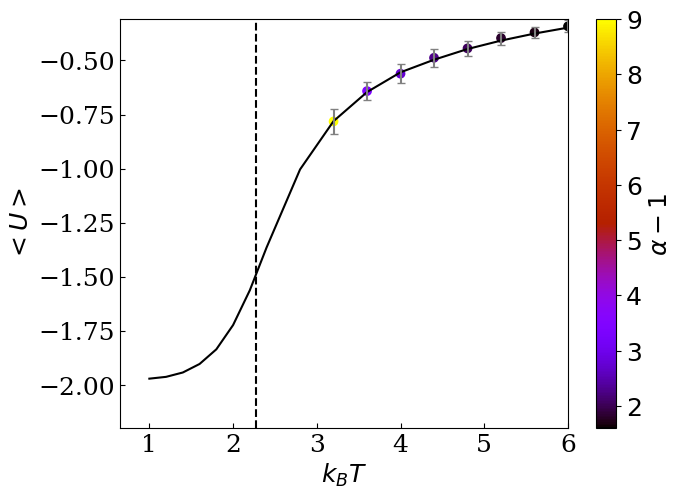

In [105]:
plot_expactation_potenergy_cmap(Pred_dict, Expectation_Reference_dict_latt6, 6, Benckmark_T=np.flip(np.array([3.2,3.6,4.0,4.4,4.8,5.2,5.6,6.0])), Benckmark_diffstep=np.array([14,15,16,18,20,24,30,79]).astype(int))

In [17]:
import os

def read_prediction(dirname, lattice_dim):
    Pred_dict = {}
    Pred_dict["Lattice_dim"] = lattice_dim
    Pred_dict["Flow"] = ReadPredF(os.path.join(dirname, "FES-MAGN.dat"))
    Pred_dict["Flow-PotE"] = ReadPredF(os.path.join(dirname, "FES-E.dat"))
    Pred_dict["FlowProbs-PotE"] = ReadPredF(os.path.join(dirname, "PROB-E.dat"))

    diffstep_list = list(Pred_dict["Flow"].keys())
    return Pred_dict, diffstep_list

In [18]:
def plot_magn(Pred_dict, Reference_dict, Reference_L, Reference_Tlist=[2.4, 2.2, 1.]):
    plt.figure()
    for i, T in enumerate(Reference_Tlist):
        baseline = 0.
        plt.plot(Reference_dict[T][0], Reference_dict[T][1]-baseline, label=r"GT ($k_BT$=%.1f, L=%d)"%(T, Reference_L), c=colors[i], alpha=0.5)
        if T == 1.:
            plt.plot(-Reference_dict[1.][0], Reference_dict[1.][1]-baseline, label=r"GT ($k_BT$=%.1f, L=%d)"%(1., Reference_L), c=colors[i], alpha=0.5)

    diffstep = 18
    baseline = 0.
    plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

    diffstep=79
    baseline = 0.
    plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

    setfigform_simple("Magnetization", "Free energy surface ($k_BT$)", ylimit=(None, 6))
    plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
def plot_potenergy(Pred_dict, Reference_dict, Reference_L, Reference_Tlist=[2.4, 2.2, 1.]):
    plt.figure()
    for i, T in enumerate(Reference_Tlist):
        # if T in [8.0]:
        #     continue
        plt.plot(Reference_dict[T][0]/Reference_L**2, Reference_dict[T][1], label=r"GT ($k_BT$=%.1f, L=%d)"%(T, Reference_L), c=colors[i], alpha=0.5)
    '''
    diffstep = 9
    plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)
    '''
    diffstep = 18
    plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]/Reference_L**2, Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

    diffstep = -1
    plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]/Reference_L**2, Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

    setfigform_simple("Potential energy (J)", "Negative likelihood")
    plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
def calc_expectation_potenergy(Pred_dict, diffstep_list):
    Pred_dict["FlowExpectations-PotE"] = []
    for diffstep in range(80):
        Jac_Expectation = Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]
        var_Prob = Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2]**2
        err_Expectation = np.sqrt(Jac_Expectation*var_Prob*Jac_Expectation).sum()
        Expectation = (Pred_dict["FlowProbs-PotE"][diffstep_list[diffstep]][1]*Pred_dict["FlowProbs-PotE"][diffstep_list[diffstep]][0]).sum()
        Pred_dict["FlowExpectations-PotE"].append([diffstep_list[diffstep], Expectation, err_Expectation])

    Pred_dict["FlowExpectations-PotE"] = np.array(Pred_dict["FlowExpectations-PotE"])

In [83]:
def plot_expactation_potenergy(Pred_dict, Reference_dict, Reference_L, Benckmark_T=[1.,], Benckmark_diffstep=[-1]):
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.plot(Reference_dict["PotE"][:,0], Reference_dict["PotE"][:,1]/Reference_L**2, c="k")
    assert len(Benckmark_T) == len(Benckmark_diffstep)
    for i in range(len(Benckmark_T)):
        plt.errorbar(Benckmark_T[i], Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],1]/Reference_L**2, yerr=Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],2]/Reference_L**2, c="blue", fmt="D", ms=8)
    plt.axvline(2/np.log(1+np.sqrt(2)), linestyle="--", c="k")
    setfigform_simple("$kBT$", "$<U>$", xlimit=(None,6))
    plt.ylim((-2.2,-400/36**2))
    plt.subplot(122)
    plt.errorbar(Pred_dict["FlowExpectations-PotE"][:,0], Pred_dict["FlowExpectations-PotE"][:,1]/Reference_L**2, yerr=Pred_dict["FlowExpectations-PotE"][:,2]/Reference_L**2, c="blue", fmt="-")
    setfigform_simple(r"$\alpha$-1", "$<U>$")
    for i in range(len(Benckmark_diffstep)):
        plt.axvline(Pred_dict["FlowExpectations-PotE"][Benckmark_diffstep[i],0], c="k", linestyle="--")

    plt.ylim((-2.2,-400/36**2))
    plt.tight_layout()

## Lattice size = 36x36
$\alpha=0.5, \alpha=1.0, \alpha=9.0$

In [22]:
ref_dirname = "/nfs/scistore14/chenggrp/ptuo/NeuralRG/data/ising-latt%dx%d-T4.0/latt%dx%d/"%(36,36,36,36)
Reference_dict_latt36 = ReadReferenceF(os.path.join(ref_dirname, "F-MAGN-REF.dat"))
Reference_dict_potE_latt36 = ReadReferenceF_potE(os.path.join(ref_dirname, "F-E-REF.dat"))


In [23]:
Expectation_Reference_dict_latt36 = {}
Expectation_Reference_dict_latt36["PotE"] = np.loadtxt(os.path.join(ref_dirname, "Expectation-E-REF.dat"), skiprows=1)

In [24]:
Pred_dict_latt36, difftime_list = read_prediction("clf/guidanceM/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/", (36,36))

In [25]:
calc_expectation_potenergy(Pred_dict_latt36, difftime_list)

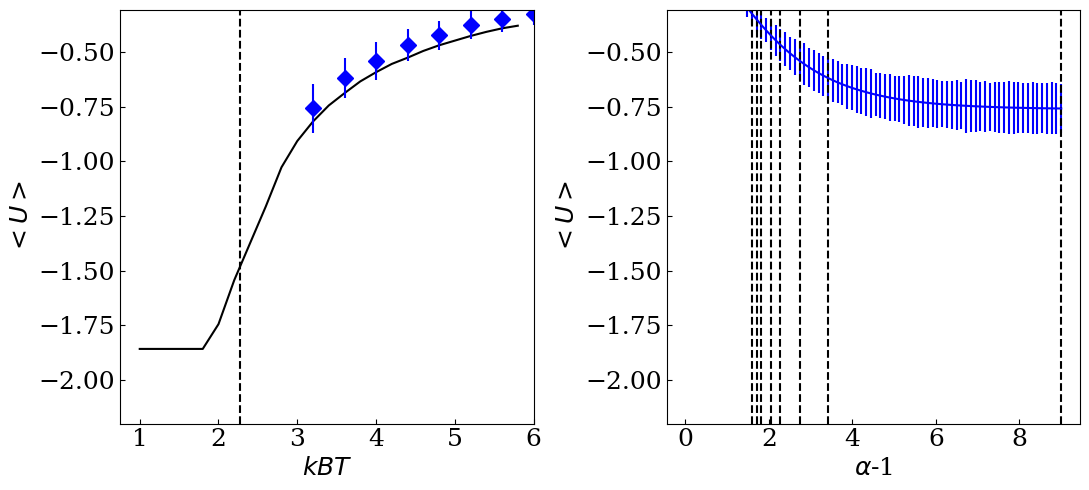

In [84]:

plot_expactation_potenergy(Pred_dict_latt36, Expectation_Reference_dict_latt36, 36, Benckmark_T=np.flip(np.array([3.2,3.6,4.0,4.4,4.8,5.2,5.6,6.0])), Benckmark_diffstep=np.array([14,15,16,18,20,24,30,79]).astype(int))

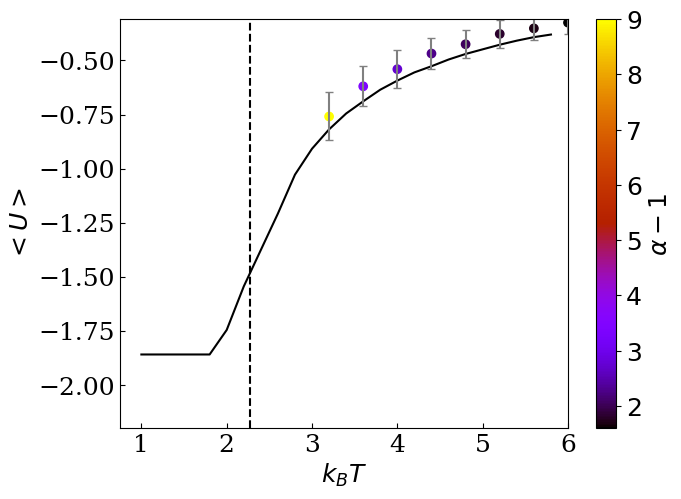

In [104]:
plot_expactation_potenergy_cmap(Pred_dict_latt36, Expectation_Reference_dict_latt36, 36, Benckmark_T=np.flip(np.array([3.2,3.6,4.0,4.4,4.8,5.2,5.6,6.0])), Benckmark_diffstep=np.array([14,15,16,18,20,24,30,79]).astype(int))